
# 📊 Stock Market Risk & Return Analysis

# 📌 Project Overview

This project performs a **Risk & Return Analysis** on selected stocks using Python.  
The objective is to understand how financial assets behave over time by analyzing their price trends, daily returns, volatility, correlations, and potential risks.

We use historical data from selected companies (Apple, Microsoft, Google, Amazon, etc.) and perform statistical and visualization-based analyses.  
By the end, we aim to answer questions like:
- How volatile are these stocks?  
- How correlated are they with each other?  
- What is the potential downside risk (Value at Risk, VaR)?  

This forms the foundation for more advanced portfolio optimization and predictive modeling.

### Objectives:
- Fetch historical stock price data with `yfinance`
- Explore data: closing price trends & trading volumes
- Compute **daily returns** and visualize their distributions
- Analyze **moving averages** for trend detection
- Study **correlations** between multiple stocks
- Estimate **Value at Risk (VaR)** using Monte Carlo Simulation

# ⚙️ Setup & Imports

In this section, we import all the required Python libraries and set up the environment.  
- `yfinance` → to fetch stock market data  
- `pandas`, `numpy` → for data wrangling and numerical calculations  
- `matplotlib`, `seaborn` → for visualization    


In [1]:

# Install required packages (uncomment if running in a fresh environment)
!pip install yfinance pandas numpy matplotlib seaborn

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")


# 📥Fetch Historical Data

We fetch daily **adjusted closing prices** and **trading volumes** using the `yfinance` package.  
The adjusted closing price accounts for stock splits and dividends, making it suitable for return calculations.  

This section prepares the core dataset on which all subsequent analysis will be performed.

In [2]:
# Define tickers and analysis period
tickers = ["AAPL", "AMZN", "GOOGL", "MSFT"]
start_date = "2019-01-01"
end_date = "2024-01-01"

# Download adjusted close prices with auto_adjust=True
adj_close = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)

# Download full historical data to get volume
full_data = yf.download(tickers, start=start_date, end=end_date)
volume = full_data["Volume"]

adj_close.head()

[*********************100%***********************]  4 of 4 completed
/tmp/ipython-input-2988956556.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  full_data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  4 of 4 completed


Price           Close                                        High             \
Ticker           AAPL       AMZN      GOOGL       MSFT       AAPL       AMZN   
Date                                                                           
2019-01-02  37.575199  76.956497  52.372780  94.789680  37.796484  77.667999   
2019-01-03  33.832439  75.014000  50.922279  91.302559  34.672361  76.900002   
2019-01-04  35.276718  78.769501  53.534267  95.548981  35.345722  79.699997   
2019-01-07  35.198212  81.475502  53.427505  95.670845  35.412358  81.727997   
2019-01-08  35.869190  82.829002  53.896770  96.364525  36.123786  83.830498   

Price                                   Low                                   \
Ticker          GOOGL       MSFT       AAPL       AMZN      GOOGL       MSFT   
Date                                                                           
2019-01-02  52.676187  95.380239  36.697207  73.046501  50.912848  92.746153   
2019-01-03  52.947810  93.917900  33.787231  74.855499  50.768342  91.115075   
2019-01-04  53.630107  96.092673  34.215516  75.915497  51.487880  92.736787   
2019-01-07  53.764180  96.805096  34.715197  79.459503  52.768052  94.658461   
2019-01-08  54.293036  97.461279  35.338589  80.830498  53.051598  95.342757   

Price            Open                                      Volume             \
Ticker           AAPL       AMZN      GOOGL       MSFT       AAPL       AMZN   
Date                                                                           
2019-01-02  36.854247  73.260002  51.008191  93.317966  148158800  159662000   
2019-01-03  34.258347  76.000504  52.173651  93.833530  365248800  139512000   
2019-01-04  34.389210  76.500000  51.770928  93.477332  234428400  183652000   
2019-01-07  35.381425  80.115501  53.678275  95.277140  219111200  159864000   
2019-01-08  35.586043  83.234497  53.928053  96.589498  164101200  177628000   

Price                           
Ticker         GOOGL      MSFT  
Date                            
2019-01-02  31868000  35329300  
2019-01-03  41960000  42579100  
2019-01-04  46022000  44060600  
2019-01-07  47446000  35656100  
2019-01-08  35414000  31514400

#🔎 Exploratory Data Analysis (EDA)

Here, we take a first look at the dataset:
- Data summary (`.info()` and `.describe()`)
- Checking for missing values  
- Plotting the **closing price** and **volume** for each stock over time  

EDA helps us build intuition about stock price trends and trading behavior before diving into deeper analysis.




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, AAPL)    1258 non-null   float64
 1   (Close, AMZN)    1258 non-null   float64
 2   (Close, GOOGL)   1258 non-null   float64
 3   (Close, MSFT)    1258 non-null   float64
 4   (High, AAPL)     1258 non-null   float64
 5   (High, AMZN)     1258 non-null   float64
 6   (High, GOOGL)    1258 non-null   float64
 7   (High, MSFT)     1258 non-null   float64
 8   (Low, AAPL)      1258 non-null   float64
 9   (Low, AMZN)      1258 non-null   float64
 10  (Low, GOOGL)     1258 non-null   float64
 11  (Low, MSFT)      1258 non-null   float64
 12  (Open, AAPL)     1258 non-null   float64
 13  (Open, AMZN)     1258 non-null   float64
 14  (Open, GOOGL)    1258 non-null   float64
 15  (Open, MSFT)     1258 non-null   float64
 16  (Volume, AAPL)   1258 non-null   int64  
 

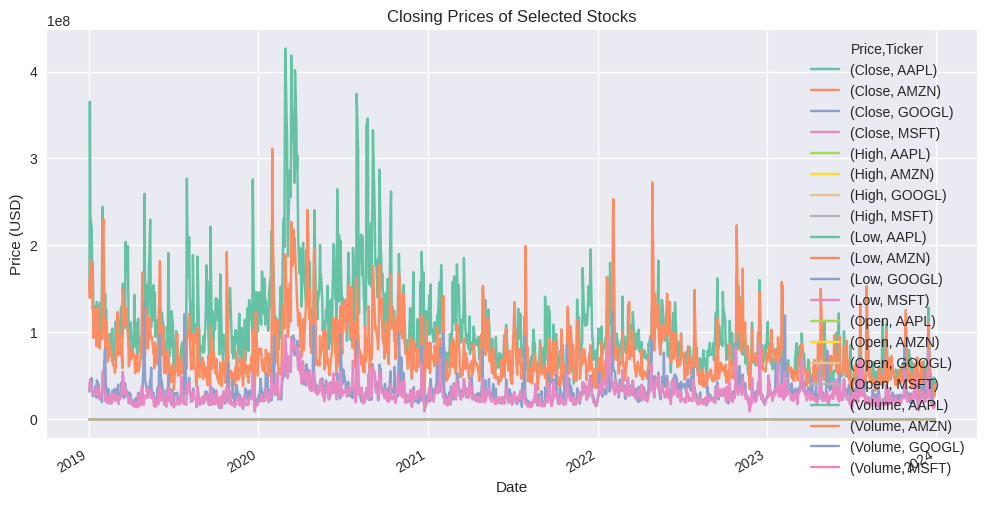

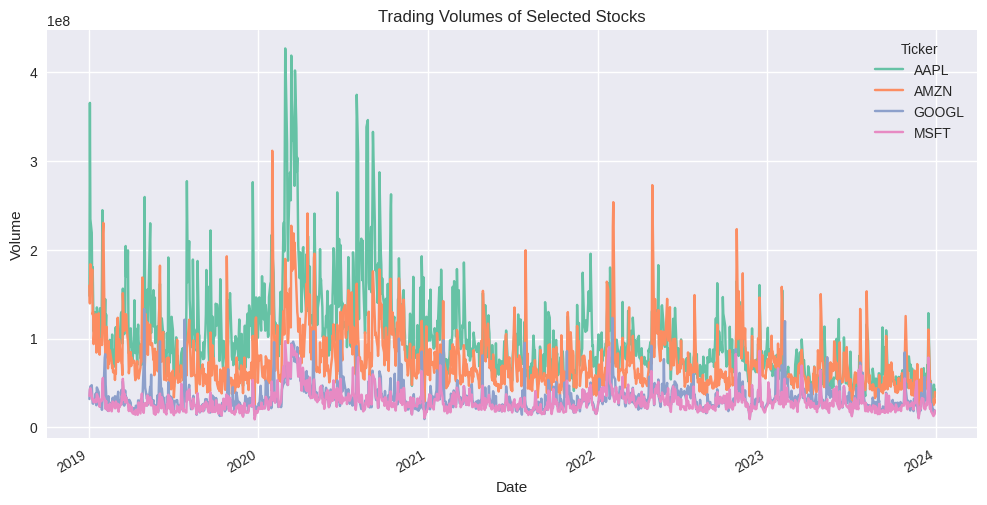

In [3]:
# Data summary
print(adj_close.info())
print(adj_close.describe())

# Closing price plot
adj_close.plot(figsize=(12,6))
plt.title("Closing Prices of Selected Stocks")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

# Trading volume plot
volume.plot(figsize=(12,6))
plt.title("Trading Volumes of Selected Stocks")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

#📈 Daily Returns

We calculate **daily returns** as the percentage change in adjusted closing prices.  

Daily returns tell us:  
- How much a stock’s price fluctuates day to day  
- Whether the stock is relatively stable or highly volatile  

We also plot the **distribution of daily returns** to observe skewness, kurtosis, and fat tails (which indicate risk of extreme losses or gains).


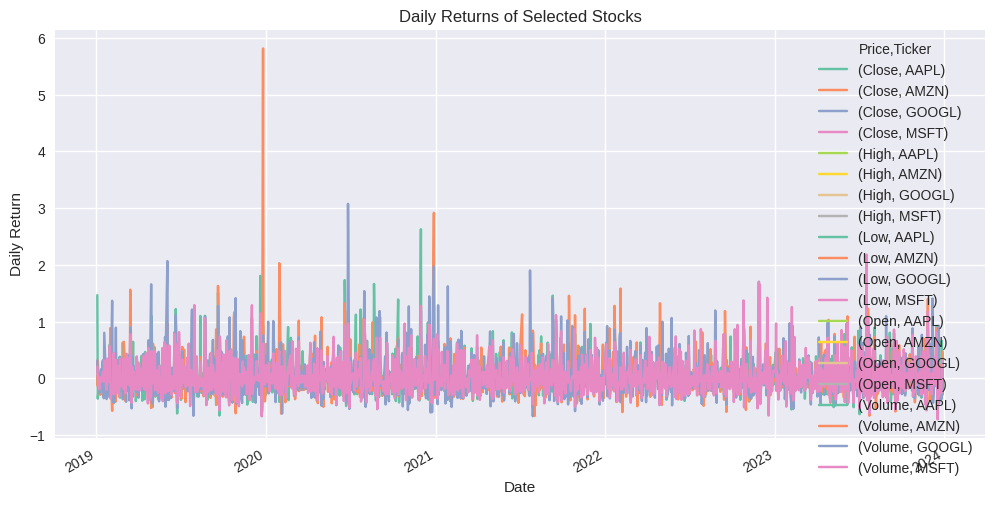

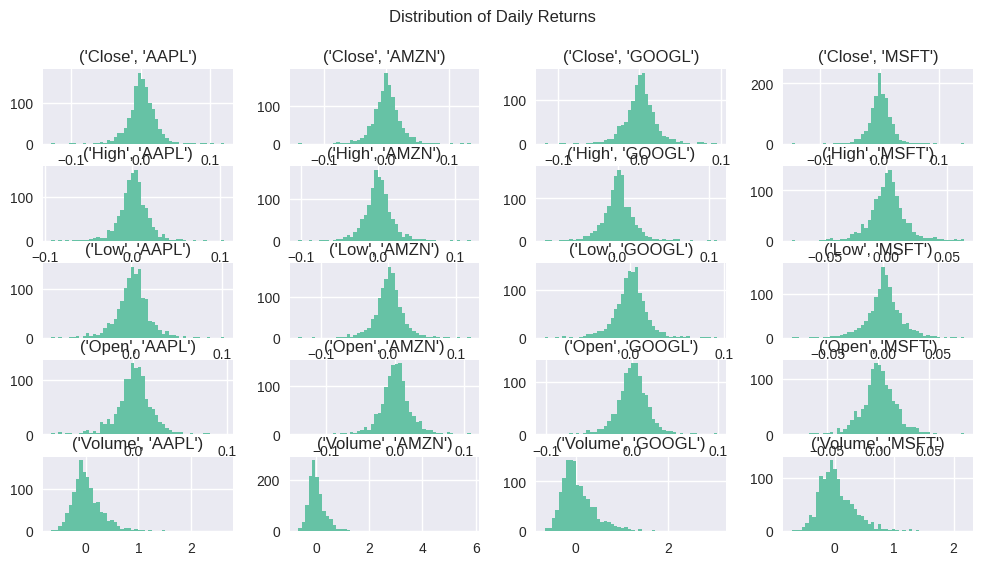

In [4]:

# Compute daily returns
daily_returns = adj_close.pct_change().dropna()

# Plot daily returns
daily_returns.plot(figsize=(12,6))
plt.title("Daily Returns of Selected Stocks")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.show()

# Histogram of returns
daily_returns.hist(bins=50, figsize=(12,6))
plt.suptitle("Distribution of Daily Returns")
plt.show()


# 📊 Moving Averages

To smooth out short-term fluctuations, we calculate **20-day** and **50-day moving averages**.  

- Shorter averages (20-day) → capture quick trend changes  
- Longer averages (50-day) → highlight long-term direction  

Plotting these against actual stock prices helps reveal bullish or bearish momentum, often used in technical analysis.

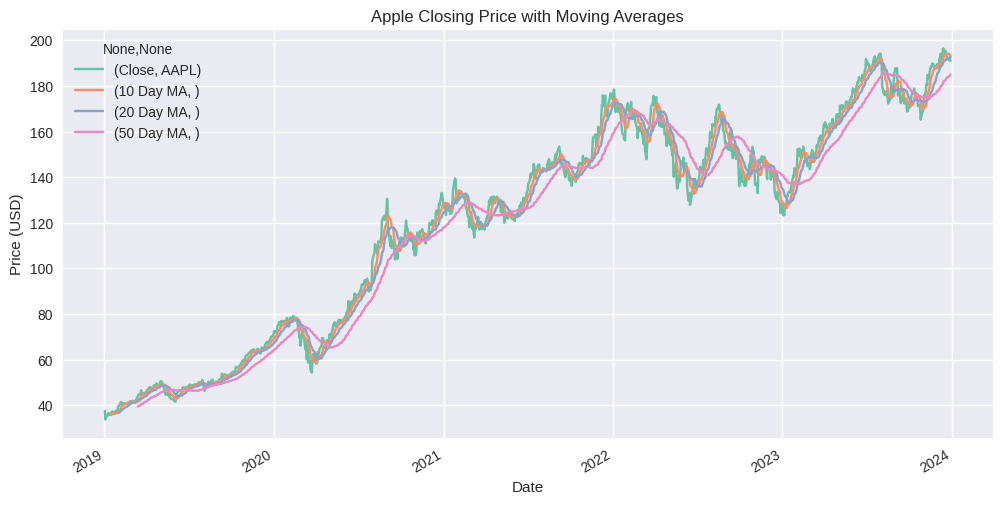

In [6]:
# Calculate moving averages for Apple stock
AAPL = adj_close[('Close', 'AAPL')].to_frame()
AAPL["10 Day MA"] = AAPL[('Close', 'AAPL')].rolling(window=10).mean()
AAPL["20 Day MA"] = AAPL[('Close', 'AAPL')].rolling(window=20).mean()
AAPL["50 Day MA"] = AAPL[('Close', 'AAPL')].rolling(window=50).mean()

# Plot moving averages
AAPL.plot(figsize=(12,6))
plt.title("Apple Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

## 🤝 Correlation Analysis

We compute the **correlation matrix** of stock daily returns.  

Correlation tells us how closely two stocks move together:  
- High correlation → both rise/fall in sync (less diversification benefit)  
- Low or negative correlation → better diversification  

We visualize the correlation using a **heatmap**, which makes diversification opportunities easier to identify.


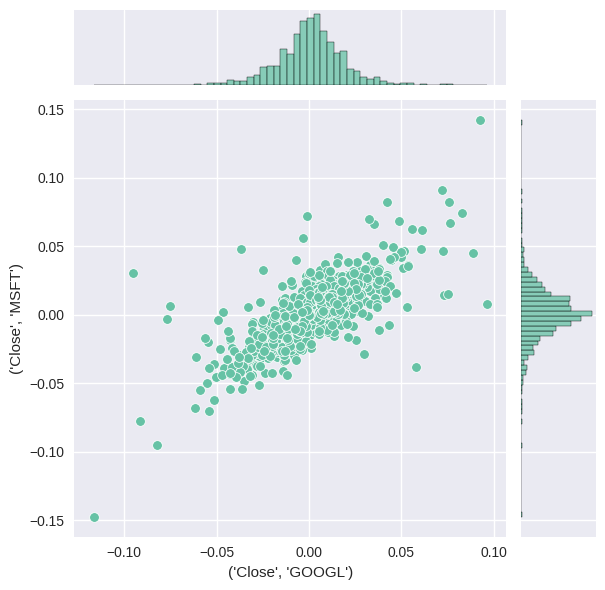

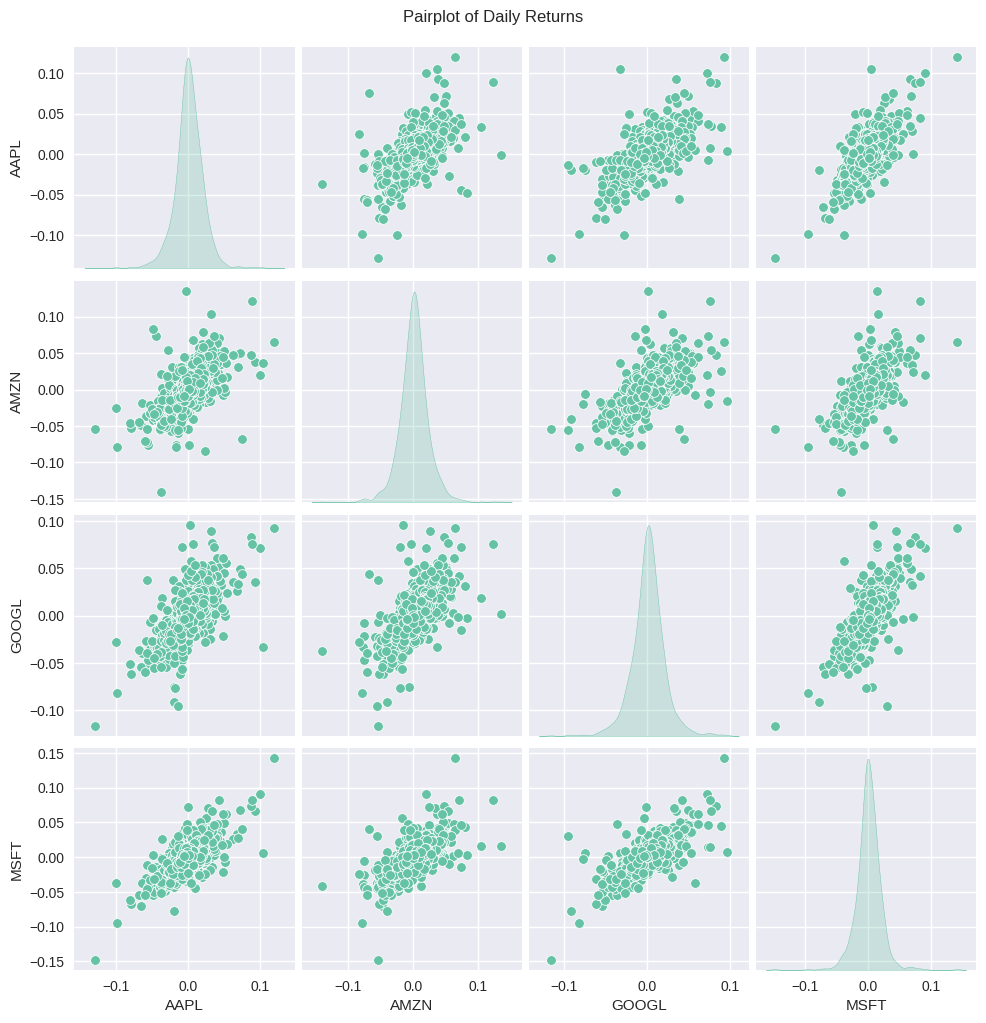

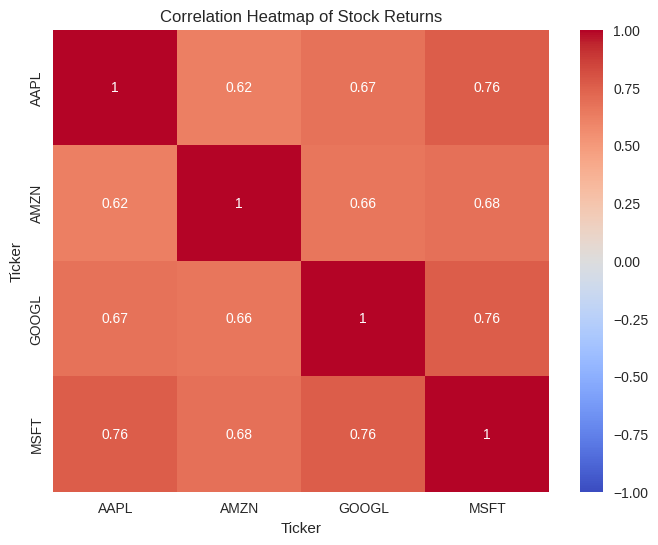

In [8]:
# Scatter plot between Google and Microsoft returns
sns.jointplot(x=('Close', "GOOGL"), y=('Close', "MSFT"), data=daily_returns, kind="scatter")
plt.show()

# Pairplot of all stock returns
sns.pairplot(daily_returns['Close'], diag_kind="kde")
plt.suptitle("Pairplot of Daily Returns", y=1.02)
plt.show()

# Correlation heatmap
corr = daily_returns['Close'].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Stock Returns")
plt.show()

# ⚠️ Value at Risk (VaR)

**Value at Risk (VaR)** estimates the maximum potential loss in a portfolio over a given time frame at a certain confidence level.


We estimate the **Value at Risk (VaR)** at 95% and 99% confidence levels.  

VaR answers: *“What is the maximum expected loss in a single day with 95% (or 99%) confidence?”*  

For example:  
- A 95% daily VaR of -2% means the stock has only a 5% chance of losing more than 2% in a single day.  

This is widely used in banks and hedge funds to quantify downside risk.



95% Value at Risk (VaR) for Apple stock: -3.21%


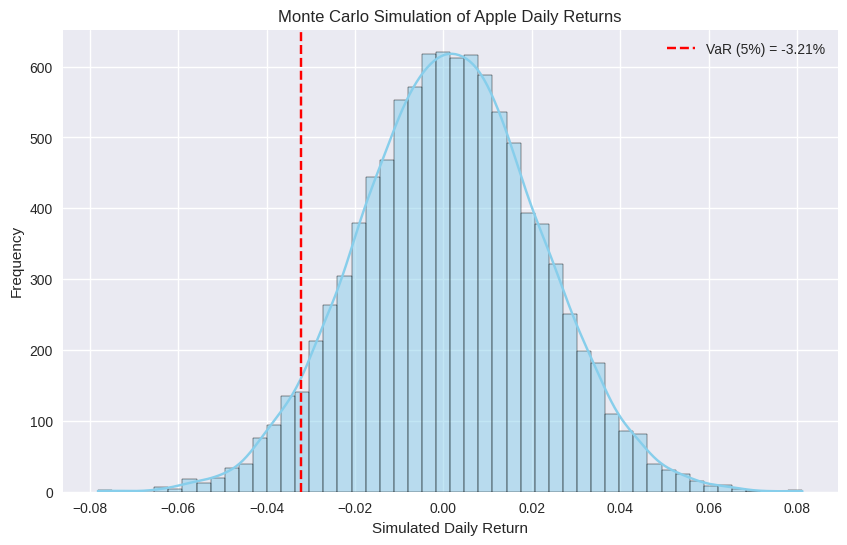

In [10]:
# Monte Carlo Simulation for Apple stock
AAPL_returns = daily_returns[('Close', 'AAPL')]
mean = AAPL_returns.mean()
std = AAPL_returns.std()

# Simulation parameters
np.random.seed(42)
num_simulations = 10000
simulated_returns = np.random.normal(mean, std, num_simulations)

# Calculate 5% Value at Risk
VaR_95 = np.percentile(simulated_returns, 5)
print(f"95% Value at Risk (VaR) for Apple stock: {VaR_95:.2%}")

# Plot simulation results
plt.figure(figsize=(10,6))
sns.histplot(simulated_returns, bins=50, kde=True, color="skyblue")
plt.axvline(VaR_95, color="red", linestyle="--", label=f"VaR (5%) = {VaR_95:.2%}")
plt.title("Monte Carlo Simulation of Apple Daily Returns")
plt.xlabel("Simulated Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#💡 Insights & Conclusion

From this analysis, we can summarize:

- **Volatility:** Some stocks (e.g., tech) showed higher daily return fluctuations, implying higher risk.  
- **Trends:** Moving averages confirmed both short-term momentum and long-term direction.  
- **Diversification:** Correlation analysis showed which stocks move together, and which provide diversification benefits.  
- **Risk Exposure:** VaR quantified the downside risk, setting clear expectations for potential daily losses.  

